In [ ]:
import os

In [ ]:
def get_class_names_from_folder(directory):
    import pathlib
    import numpy as np
    data_dir=pathlib.Path(directory)
    class_names=np.array(sorted([item.name for item in data_dir.glob("*")]))
    return class_names
    print(class_names)

In [ ]:
class_names=get_class_names_from_folder('/content/drive/MyDrive/Currency_dataset_edited_sample/train')

In [ ]:
len(class_names)

12

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os
import random

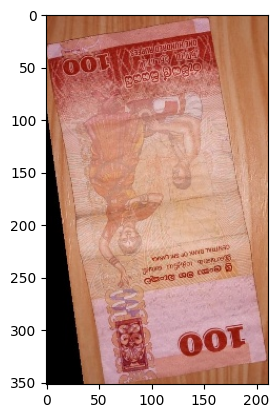

In [ ]:
def visualize_random_image(target_dir, target_class):
  image_dir= target_dir+ target_class
  random_image=random.sample(os.listdir(image_dir),1)
  img= mpimg.imread(image_dir+ "/"+ random_image[0] )
  plt.imshow(img)

visualize_random_image('/content/drive/MyDrive/Currency_dataset_edited_sample/train/','100_2')

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:


train_datagen=ImageDataGenerator()
test_datagen=ImageDataGenerator()
# test_datagen=ImageDataGenerator(rescale=1/255.)

val_datagen=ImageDataGenerator()

train_data= train_datagen.flow_from_directory(directory="/content/drive/MyDrive/Currency_dataset_edited_sample/train",
                                              target_size=(240,240),
                                              batch_size=100,
                                              class_mode="categorical")

test_data= test_datagen.flow_from_directory(directory="/content/drive/MyDrive/Currency_dataset_edited_sample/test",
                                              target_size=(240,240),
                                              batch_size=100,
                                              class_mode="categorical")

validation_data= val_datagen.flow_from_directory(directory="/content/drive/MyDrive/Currency_dataset_edited_sample/validation",
                                              target_size=(240,240),
                                              batch_size=100,
                                              class_mode="categorical")

Found 3862 images belonging to 12 classes.
Found 202 images belonging to 12 classes.
Found 1001 images belonging to 12 classes.


In [ ]:
# Set random seed

tf.random.set_seed(42)
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam


In [ ]:
data_augmentation=tf.keras.Sequential(
    [
        tf.keras.layers.RandomFlip('horizontal',input_shape=(240,240,3)),
    ]
)


In [ ]:
#create model

# model= Sequential([
#     Conv2D(10,3,activation='relu', input_shape=(240,240,3)),
#     MaxPool2D(pool_size=2),
#     Conv2D(10,3,activation='relu'),
#     MaxPool2D(pool_size=2),
#     Flatten(),
#     Dense(12, activation='softmax')
# ])



model = tf.keras.models.Sequential()

model.add(data_augmentation)

model.add(tf.keras.layers.Conv2D(32,(3,3), activation='relu',input_shape=(128,128,3)))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(64, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Conv2D(128, kernel_size=3, activation='relu'))
model.add(tf.keras.layers.MaxPool2D())

model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.Flatten())

model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))


model.add(tf.keras.layers.Dense(12, activation='softmax'))


model.compile(loss="categorical_crossentropy",
              optimizer=Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history =model.fit(train_data,batch_size=64,
                   epochs=100,
                   steps_per_epoch=len(train_data),
                   validation_data=validation_data,
                   validation_steps=len(validation_data))

Epoch 1/100
39/39 [==============================] - 2590s 66s/step - loss: 2.5746 - accuracy: 0.1631 - val_loss: 5.7351 - val_accuracy: 0.1429
Epoch 2/100
39/39 [==============================] - 32s 811ms/step - loss: 2.0284 - accuracy: 0.2985 - val_loss: 2.3518 - val_accuracy: 0.2378
Epoch 3/100
39/39 [==============================] - 32s 816ms/step - loss: 1.6375 - accuracy: 0.4303 - val_loss: 2.9009 - val_accuracy: 0.2517
Epoch 4/100
39/39 [==============================] - 32s 809ms/step - loss: 1.4054 - accuracy: 0.5184 - val_loss: 1.8729 - val_accuracy: 0.3746
Epoch 5/100
39/39 [==============================] - 32s 817ms/step - loss: 1.1142 - accuracy: 0.6165 - val_loss: 2.3043 - val_accuracy: 0.3037
Epoch 6/100
39/39 [==============================] - 32s 817ms/step - loss: 0.9780 - accuracy: 0.6655 - val_loss: 2.1676 - val_accuracy: 0.3646
Epoch 7/100
39/39 [==============================] - 32s 813ms/step - loss: 0.7206 - accuracy: 0.7597 - val_loss: 1.8970 - val_accuracy:

In [ ]:
model.evaluate(test_data)

3/3 [==============================] - 2s 404ms/step - loss: 2.1784 - accuracy: 0.6782


[2.1784093379974365, 0.6782178282737732]

<Axes: >

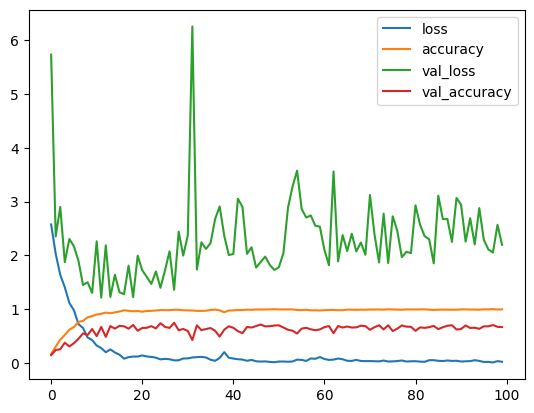

In [ ]:
import pandas as pd

pd.DataFrame(history.history).plot()

In [ ]:
!wget https://www.cbsl.gov.lk/sites/default/files/100-F.jpg

--2024-01-15 12:06:08--  https://www.cbsl.gov.lk/sites/default/files/100-F.jpg
Resolving www.cbsl.gov.lk (www.cbsl.gov.lk)... 18.155.68.108, 18.155.68.27, 18.155.68.60, ...
Connecting to www.cbsl.gov.lk (www.cbsl.gov.lk)|18.155.68.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167250 (163K) [image/jpeg]
Saving to: ‘100-F.jpg’

100-F.jpg           100%[===================>] 163.33K  --.-KB/s    in 0.005s  

2024-01-15 12:06:11 (30.7 MB/s) - ‘100-F.jpg’ saved [167250/167250]



In [ ]:
def load_and_resize_image(filename,size):
  img = tf.io.read_file(filename)
  img =tf.image.decode_image(img)
  img =tf.image.resize(img, [size,size])
  img = img/255
  return img

image = load_and_resize_image("100-F.jpg",240)
pred =model.predict(tf.expand_dims(image,axis=0))
class_names[pred[0].argmax()]

1/1 [==============================] - 0s 43ms/step


'100_2'

In [ ]:
!wget https://www.cbsl.gov.lk/sites/default/files/1000-F.jpg

image = load_and_resize_image("1000-F.jpg",240)
pred =model.predict(tf.expand_dims(image,axis=0))
class_names[pred[0].argmax()]

--2024-01-15 12:06:47--  https://www.cbsl.gov.lk/sites/default/files/1000-F.jpg
Resolving www.cbsl.gov.lk (www.cbsl.gov.lk)... 18.155.68.108, 18.155.68.52, 18.155.68.27, ...
Connecting to www.cbsl.gov.lk (www.cbsl.gov.lk)|18.155.68.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172461 (168K) [image/jpeg]
Saving to: ‘1000-F.jpg’

1000-F.jpg          100%[===================>] 168.42K  --.-KB/s    in 0.005s  

2024-01-15 12:06:51 (30.6 MB/s) - ‘1000-F.jpg’ saved [172461/172461]

1/1 [==============================] - 0s 17ms/step


'100_2'

In [ ]:
from PIL import Image
image_path = '/content/drive/MyDrive/Currency_dataset_edited_sample/test/20_1/1060.jpg'
img = Image.open(image_path)

image2 =load_and_resize_image(image_path,240)
pred =model.predict(tf.expand_dims(image2,axis=0))
print(pred)
print(class_names)
max_class_index = pred[0].argmax()
print("Class with Maximum Probability:", class_names[max_class_index])

1/1 [==============================] - 0s 20ms/step
[[8.1727181e-10 6.1846106e-09 1.8675055e-04 9.9966192e-01 1.6848046e-06
  2.3733544e-05 1.2578667e-04 1.9291672e-08 3.3148392e-08 1.6325325e-08
  1.2157277e-07 3.5120013e-13]]
['1000_1' '1000_2' '100_1' '100_2' '20_1' '20_2' '5000_1' '5000_2' '500_1'
 '500_2' '50_1' '50_2']
Class with Maximum Probability: 100_2


In [ ]:
# Convert to TF Lite

In [ ]:
import tensorflow as tf



# Save the model in the SavedModel format
model.save("/content/drive/MyDrive/sample_currency model")


In [ ]:
converter = tf.lite.TFLiteConverter.from_saved_model("/content/drive/MyDrive/sample_currency model")
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_model = converter.convert()

# Save the TFLite model to a file
# Save the TensorFlow Lite model to a file (not a directory)
with open("/content/drive/MyDrive/sample_currency model/tflitemodel/model.tflite", "wb") as f:
    f.write(tflite_model)

In [ ]:
def load_and_resize_image(filename,size):
  img = tf.io.read_file(filename)
  img =tf.image.decode_image(img)
  img =tf.image.resize(img, [size,size])
  img = img/255
  return img

import tensorflow as tf
interpreter = tf.lite.Interpreter(model_path="/content/drive/MyDrive/sample_currency model/tflitemodel/model.tflite")
interpreter.allocate_tensors()
import numpy as np

# Get input and output details
input_details = interpreter.get_input_details()
print(input_details)
output_details = interpreter.get_output_details()

# Example image file path
image_path = "/content/drive/MyDrive/Currency_dataset_edited_sample/test/20_1/1060.jpg"

input_image = load_and_resize_image(image_path, size=input_details[0]['shape'][1])

# Reshape the input image to match the model's input shape
input_image = tf.reshape(input_image, input_details[0]['shape'])

# Set the input tensor
interpreter.set_tensor(input_details[0]['index'], input_image)

# Run the inference
interpreter.invoke()

# Get the output tensor
output = interpreter.get_tensor(output_details[0]['index'])

# Process the output as needed
# ...

print("Predictions:", output)

pred =model.predict(tf.expand_dims(image2,axis=0))
decimal_predictions = pred.flatten().tolist()
print(decimal_predictions)
# class_names[pred[0].argmax()]
# max_index = np.argmax(pred)

# Print the index
# print("Index of Maximum Value:", max_index)

# max_class_index = pred[0].argmax()
# print("Class with Maximum Probability:",max_class_index)
# print(class_names[pred[0].argmax()])
# print(class_names)

[{'name': 'serving_default_sequential_input:0', 'index': 0, 'shape': array([  1, 240, 240,   3], dtype=int32), 'shape_signature': array([ -1, 240, 240,   3], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
Predictions: [[2.1125746e-03 5.5671294e-06 2.5991988e-04 2.7024068e-04 1.2153256e-02
  9.2956625e-02 5.0768518e-01 3.8197449e-01 2.3314217e-03 4.6880064e-06
  2.4964875e-05 2.2104716e-04]]
1/1 [==============================] - 0s 66ms/step
[8.172718057863904e-10, 6.184610601422946e-09, 0.00018675054889172316, 0.999661922454834, 1.6848046016093576e-06, 2.373354436713271e-05, 0.0001257866679225117, 1.9291672259669213e-08, 3.314839247536838e-08, 1.6325325091770537e-08, 1.2157276785274007e-07, 3.512001345122584e-13]


In [ ]:
print(class_names)

['1000_1' '1000_2' '100_1' '100_2' '20_1' '20_2' '5000_1' '5000_2' '500_1'
 '500_2' '50_1' '50_2']
